# Flare 2023/06/09

In [1]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2023-06-09/fits/"

maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return f"{folder_path}nb_3950_2023-06-09T17_01_03_17_01_03=0-123_mixed_corrected_export2023-07-24T14_21_14_im.fits"
ttff = timeframe_to_filename_fits



In [3]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
head0

SIMPLE  =                    T / Written by IDL:  Thu Jun 29 11:56:44 2023      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 2005 / Number of positions along axis 1               
NAXIS2  =                 2110 / Number of positions along axis 2               
NAXIS3  =                   29 / Number of positions along axis 3               
NAXIS4  =                    1 / Number of positions along axis 4               
NAXIS5  =                  124 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
PC1_1   =              1.00000 / No rotations                                   
PC2_2   =              1.00000 / No rotations                                   
PC3_3   =              1.00000 / No rotations                                   
PC4_4   =              1.000

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[5].data
    pos = io[1].data

# shape data: [(58, 1, 33, 2773, 2783)-data,  positons , array SIM_XY????, date and time frames,  
# (58, 1, 1, 2773, 2783)-data, terug date+time frames, nog eens date+time frames, en nog eens, array orde e10,  
# frame umbers , ....     errors?,  errors?]


wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstCaK.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001C6FDAFD310>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB23020>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB23890>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB23FE0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB30770>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB30EC0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001C6FD4BC9E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB320F0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB23A10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB23140>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB31E20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB313A0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB30AD0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C6FDB30050>, <astropy.io.fits.hdu.ta

[[[[['2023-06-09T17:01:04.28345']]

   [['2023-06-09T17:01:04.62241']]

   [['2023-06-09T17:01:04.98873']]

   ...

   [['2023-06-09T17:01:13.39170']]

   [['2023-06-09T17:01:13.72008']]

   [['2023-06-09T17:01:14.26162']]]]



 [[[['2023-06-09T17:01:29.47624']]

   [['2023-06-09T17:01:29.80484']]

   [['2023-06-09T17:01:30.13359']]

   ...

   [['2023-06-09T17:01:38.55380']]

   [['2023-06-09T17:01:38.86977']]

   [['2023-06-09T17:01:39.48202']]]]



 [[[['2023-06-09T17:01:54.42490']]

   [['2023-06-09T17:01:54.76392']]

   [['2023-06-09T17:01:55.12082']]

   ...

   [['2023-06-09T17:02:03.58067']]

   [['2023-06-09T17:02:03.92190']]

   [['2023-06-09T17:02:04.50161']]]]



 ...



 [[[['2023-06-09T17:51:29.54720']]

   [['2023-06-09T17:51:29.88601']]

   [['2023-06-09T17:51:30.21672']]

   ...

   [['2023-06-09T17:51:38.36914']]

   [['2023-06-09T17:51:38.69745']]

   [['2023-06-09T17:51:39.28699']]]]



 [[[['2023-06-09T17:51:54.40407']]

   [['2023-06-09T17:51:54.74260']]

   [['20

In [5]:
pos[0][0][:,:,0,0,2][0]

array([396.64692773, 396.67192773, 396.69692773, 396.72192773,
       396.74692773, 396.75692773, 396.76692773, 396.77692773,
       396.78692773, 396.79692773, 396.80692773, 396.81692773,
       396.82692773, 396.83692773, 396.84692773, 396.85692773,
       396.86692773, 396.87692773, 396.88692773, 396.89692773,
       396.90692773, 396.91692773, 396.92692773, 396.93692773,
       396.94692773, 396.97192773, 396.99692773, 397.02192773,
       399.9       ], dtype='>f8')

In [6]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3

('11:28:01',
 array(['DATE: 2023-06-17T11:27:45', 'DATE: 2023-06-17T11:27:53',
        'DATE: 2023-06-17T11:28:01', 'DATE: 2023-06-17T11:28:09',
        'DATE: 2023-06-17T11:28:17', 'DATE: 2023-06-17T11:28:24',
        'DATE: 2023-06-17T11:28:32', 'DATE: 2023-06-17T11:28:40',
        'DATE: 2023-06-17T11:28:49', 'DATE: 2023-06-29T11:24:39',
        'DATE: 2023-06-17T11:29:04', 'DATE: 2023-06-17T11:29:12',
        'DATE: 2023-06-17T11:29:20', 'DATE: 2023-06-17T11:29:29',
        'DATE: 2023-06-17T11:29:36', 'DATE: 2023-06-17T11:29:44',
        'DATE: 2023-06-17T11:29:51', 'DATE: 2023-06-17T11:29:59',
        'DATE: 2023-06-17T11:30:07', 'DATE: 2023-06-19T14:52:37',
        'DATE: 2023-06-17T11:30:22', 'DATE: 2023-06-19T15:23:50',
        'DATE: 2023-06-19T14:58:52', 'DATE: 2023-06-17T11:30:46',
        'DATE: 2023-06-17T11:30:54', 'DATE: 2023-06-17T11:31:02',
        'DATE: 2023-06-19T15:05:06', 'DATE: 2023-06-17T11:31:17',
        'DATE: 2023-06-17T11:31:25', 'DATE: 2023-06-17T11:31:32

In [7]:
time_list = [t[17:] for t in tlist3]
time_list

['11:27:45',
 '11:27:53',
 '11:28:01',
 '11:28:09',
 '11:28:17',
 '11:28:24',
 '11:28:32',
 '11:28:40',
 '11:28:49',
 '11:24:39',
 '11:29:04',
 '11:29:12',
 '11:29:20',
 '11:29:29',
 '11:29:36',
 '11:29:44',
 '11:29:51',
 '11:29:59',
 '11:30:07',
 '14:52:37',
 '11:30:22',
 '15:23:50',
 '14:58:52',
 '11:30:46',
 '11:30:54',
 '11:31:02',
 '15:05:06',
 '11:31:17',
 '11:31:25',
 '11:31:32',
 '11:31:40',
 '11:31:48',
 '11:31:55',
 '19:12:40',
 '19:17:54',
 '11:32:18',
 '11:11:21',
 '11:32:33',
 '11:32:42',
 '11:32:49',
 '11:32:57',
 '11:33:05',
 '11:33:12',
 '11:33:19',
 '11:33:27',
 '11:33:35',
 '11:33:43',
 '11:33:51',
 '11:33:59',
 '11:34:06',
 '15:17:38',
 '11:34:22',
 '11:34:29',
 '11:34:37',
 '11:34:45',
 '11:34:53',
 '11:35:01',
 '11:35:09',
 '11:35:17',
 '11:35:24',
 '11:35:33',
 '11:35:40',
 '11:35:48',
 '11:35:55',
 '11:36:03',
 '11:36:13',
 '11:36:21',
 '11:36:28',
 '11:36:36',
 '11:36:44',
 '11:36:52',
 '11:36:59',
 '11:37:07',
 '11:37:14',
 '11:37:22',
 '11:37:30',
 '11:37:38',

In [8]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [9]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (29, 2110, 2005)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

E:/solar flares/data/2023-06-09/fits/nb_3950_2023-06-09T17_01_03_17_01_03=0-123_mixed_corrected_export2023-07-24T14_21_14_im.fits
s=(29, 2110, 2005)
the shape of the data is (124, '??', 29, 2110, 2005)
the wavelengths are self._wavel = array([3966.46927734, 3966.71927734, 3966.96927734, 3967.21927734,
       3967.46927734, 3967.56927734, 3967.66927734, 3967.76927734,
       3967.86927734, 3967.96927734, 3968.06927734, 3968.16927734,
       3968.26927734, 3968.36927734, 3968.46927734, 3968.56927734,
       3968.66927734, 3968.76927734, 3968.86927734, 3968.96927734,
       3969.06927734, 3969.16927734, 3969.26927734, 3969.36927734,
       3969.46927734, 3969.71927734, 3969.96927734, 3970.21927734,
       3999.        ])
Boundary
Blue=Outside, yellow=Inside


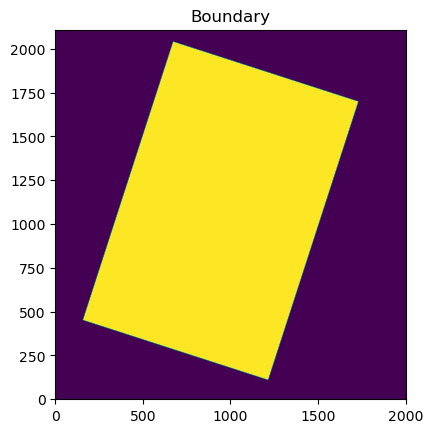

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

CaK = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstCaK.npy', number_of_frames=maximum,
                 time=time_list, name_of_line='CaK23', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='search', 
                 boundary_arguments = {"error":0.01}, with_stokes=True, with_time=True, alternative_datacube=datacube)

# CaK.datacube
# np.shape(CaK.datacube), CaK.datacube(0)[0:30:5,10:20:5, 100:200:30], 
CaK.boundary


In [11]:
# CaK.calculate__FOV_spect_over_time()

In [12]:
secs = un.get_TIME(CaK)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{CaK.shape=}')

the mean cadence is 7.658536585365909 seconds for this line!
CaK.shape=(124, '??', 29, 2110, 2005)


The guessed filters are [[4.333333333333333, 3.625], [14.0, 3.625], [23.666666666666668, 3.625]]


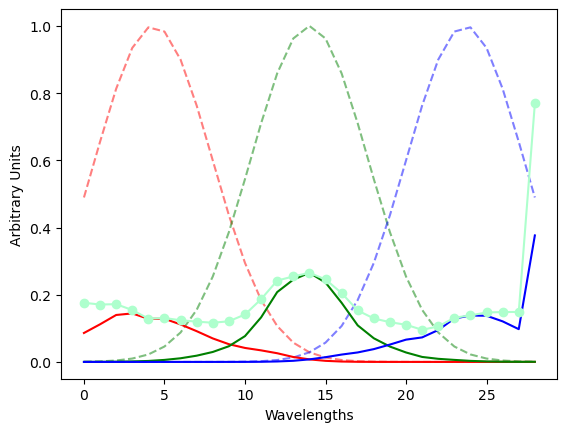

In [13]:
# %matplotlib inline
CaK.update_filters(None)# [[3,2], [7,2], [11,2]]
CaK.plot_filt(880,900)
plt.show()

the number of frames is 124
frame number 0 at time 11:27:45


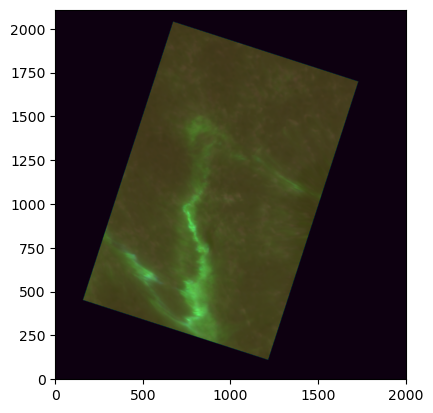

(2110, 2005, 3)
frame number 19 at time 14:52:37


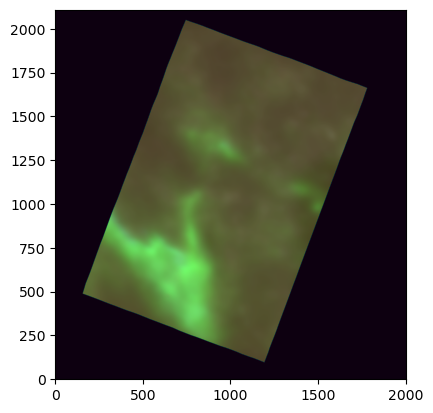

(2110, 2005, 3)
frame number 38 at time 11:32:42


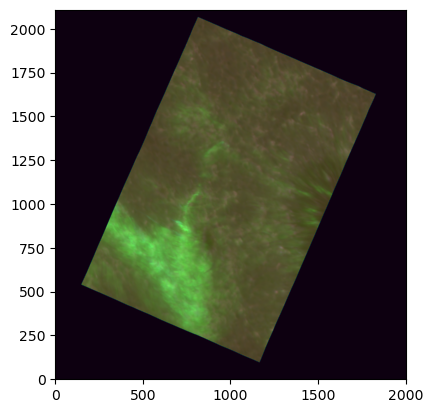

(2110, 2005, 3)
frame number 57 at time 11:35:09


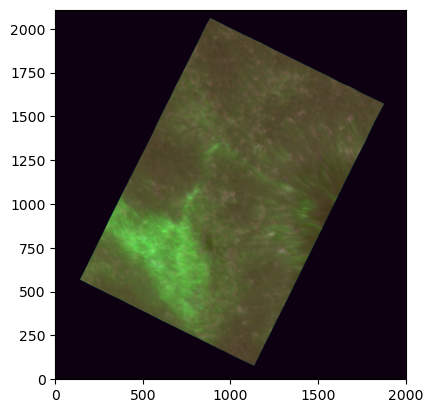

(2110, 2005, 3)
frame number 76 at time 11:37:38


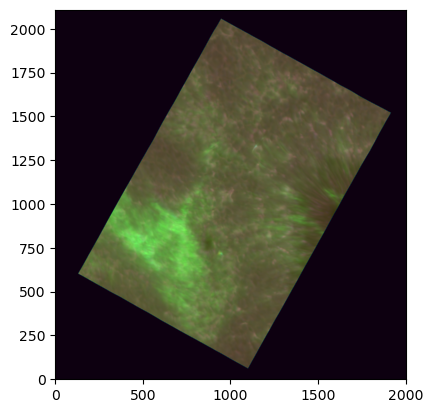

(2110, 2005, 3)
frame number 95 at time 11:39:59


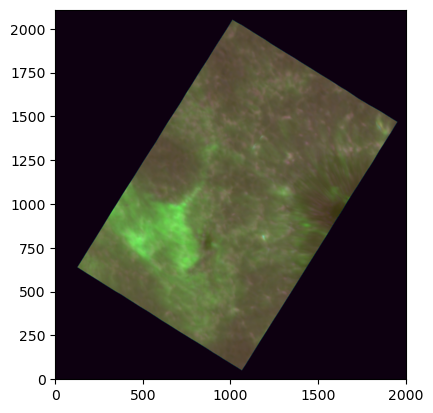

(2110, 2005, 3)
frame number 114 at time 11:42:21


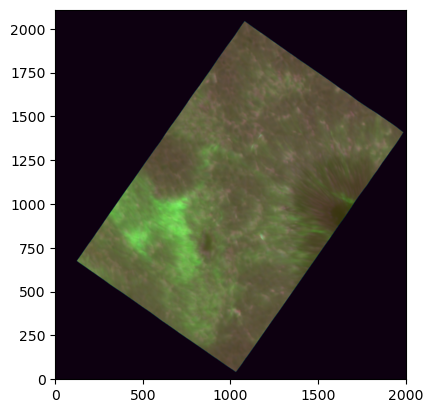

(2110, 2005, 3)


In [14]:
# %matplotlib widget
print(f'the number of frames is {CaK._number_of_frames}')
for frame in range(0 ,CaK._number_of_frames, 19):
    # frame=0
    CaK.ccp_frame(frame,Show=False)
    print(f'frame number {frame} at time {CaK._time[frame]}')
    plt.imshow(CaK.current_ccp, origin='lower')
    plt.imshow(CaK.calculate_boundary(frame=frame), alpha=0.2, origin="lower")

    # plt.imshow(CaK.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(CaK.current_ccp))#,np.shape(CaK.boundary))

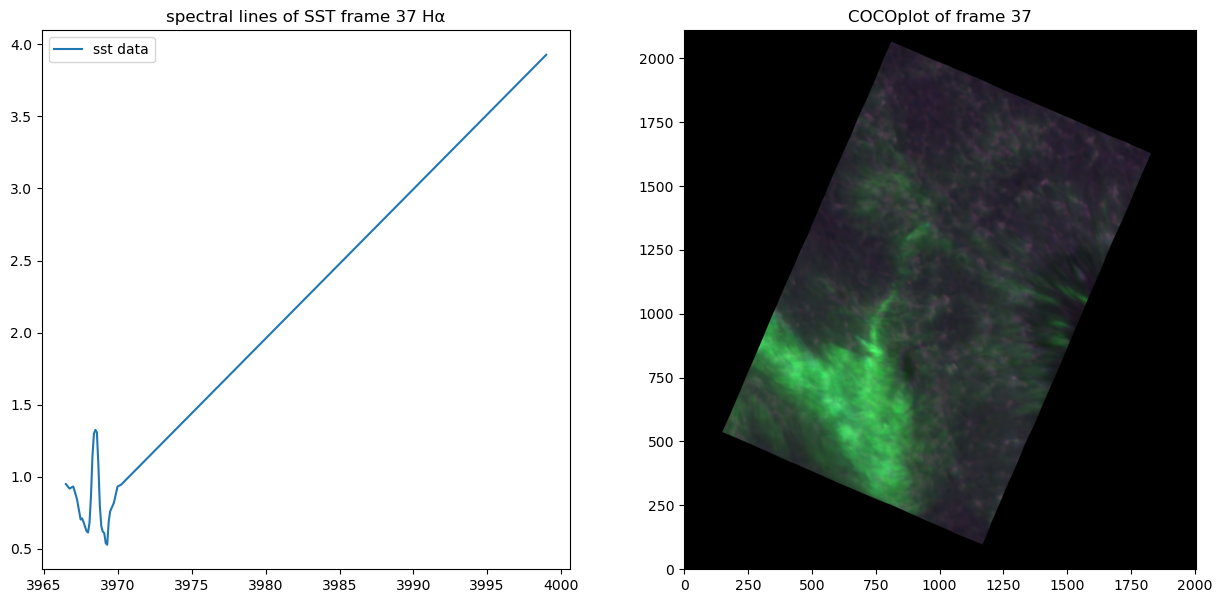

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 37
CaK.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
CaK.frame_integrated_spect(frame)
ax[0].plot(CaK._wavel, CaK.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(CaK.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()


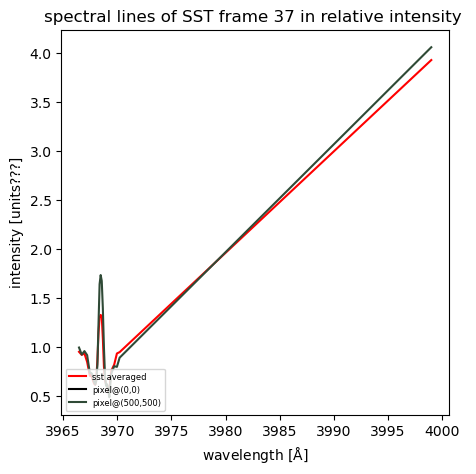

In [16]:
CaK.current_ccp[0:30:10,0:60:20,:]
CaK.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

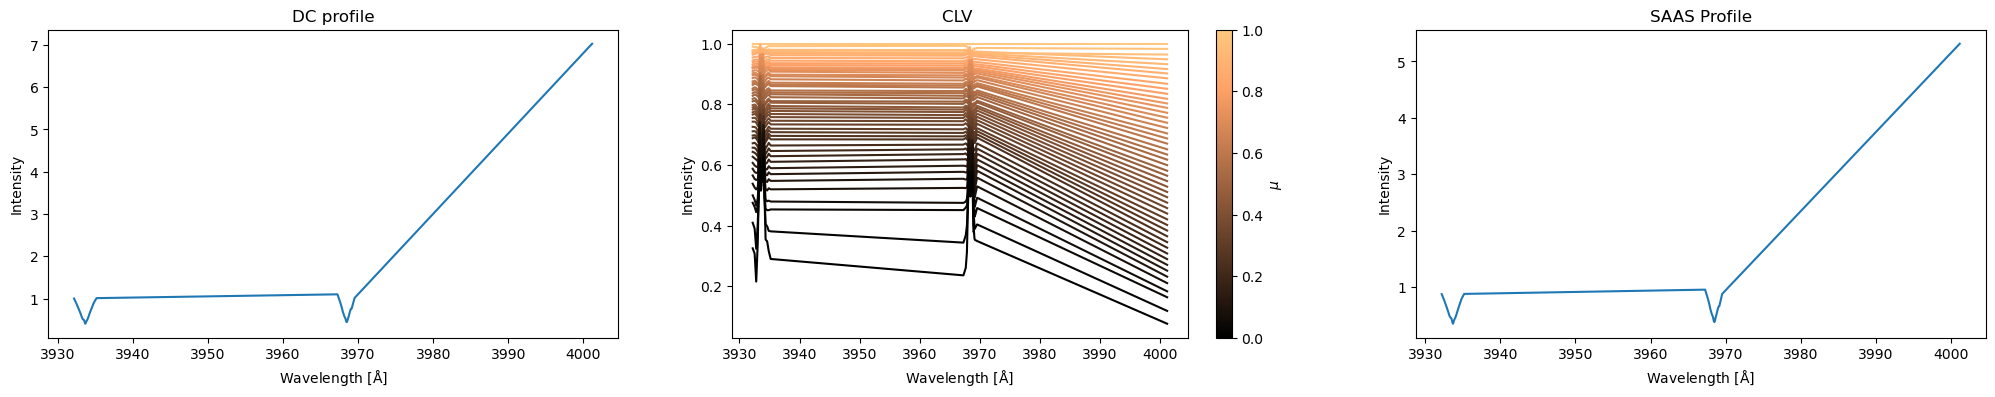

3935.025480025824 3951.030569782743


In [49]:
reload(un)
theor_CaK = un.linestudier('final_3950.npy', atlas=None, nr=101, neglect_atlas=True)
print(np.median(theor_CaK.sst_wav), np.mean(theor_CaK.sst_wav))

## Calculating the $\mu$ !!!!! 


In [18]:
CaK.shape

(124, '??', 29, 2110, 2005)

In [19]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(CaK.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass

x= -598.761391414
y = -353.460135090 
pix_x=  1392.00 
pix_y = 1387.00 

SIMPLE  =                    T / Written by IDL:  Thu Jun 29 11:56:44 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 2005 / Number of positions along axis 1              
 NAXIS2  =                 2110 / Number of positions along axis 2              
 NAXIS3  =                   29 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                  124 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 PC1_1   =              1.00000 / No rotations                                  
 PC2_2   =              1.00000 / No rotations                                  
 PC3_3   =              1.00000 / No rotations                                  
 PC4_4   =              1.000

In [20]:
# WCSNAMEA= 'AVERAGED APPROXIMATE HPLN-TAN/HPLT-TAN CENTER POINT' /               
# CRPIX1A =              1392.00 / Center pixel of image array                    
# CRPIX2A =              1387.00 / Center pixel of image array                    
# CRVAL1A =       -598.761391414 / [arcsec] Coordinates of center of image array  
# CRVAL2A =       -353.460135090 / [arcsec] Coordinates of center of image array  
# CDELT1A =              0.00000 / Zero FOV extent                                
# CDELT2A =              0.00000 / Zero FOV extent                                
# SPECSYS = 'TOPOCENT'           / Coordinate reference frame = observer          

In [38]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
np.shape(xy), xy[maximum//2,0], fxp, fyp

((124, 29, 2, 2, 2),
 array([[[-633.27628936, -391.54896442],
         [-557.32468936, -391.54896442]],
 
        [[-633.27628936, -311.61786442],
         [-557.32468936, -311.61786442]]], dtype='>f8'),
 array([-633.27628936, -557.32468936, -391.54896442, -311.61786442]),
 array([-391.54896442, -311.61786442], dtype='>f8'))

width = 133.7375
[-633.27628936 -557.32468936 -391.54896442 -311.61786442]
does MU contain nan's? False


AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.691640091162702 for timeframe 10
Coundourplot succesfully saved.


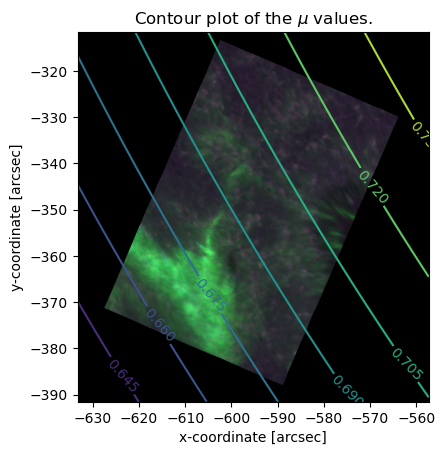

In [39]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 0.13 * np.average(CaK.shape[-2:])/2
print(f"{width = }")

# or per pixel 0.13 arcsec

position = (x,y)


print(fxp)

x = np.linspace(fxp[0], fxp[1], CaK.shape[4])
y = np.linspace(fyp[0], fyp[1], CaK.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=CaK, save=True, save_name=CaK.name_of_line, timeFrame=10)
sst_data = CaK
theor_line = theor_CaK
set_mu(CaK, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaK.index_mu], theor_line.sst_clv[theor_CaK.index_mu][0], clv_fit(mu, theor_line)


(211, 201) (211, 201) (210, 200)


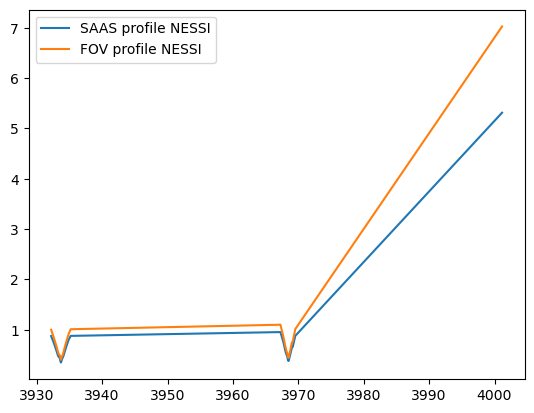

In [50]:
theor_CaK.set_fov( xx, yy, CaK.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

In [51]:
frame, CaK.shape

(28, (124, '??', 29, 2110, 2005))

<>:42: SyntaxWarning: invalid escape sequence '\C'
<>:42: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18676\2325426515.py:42: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')


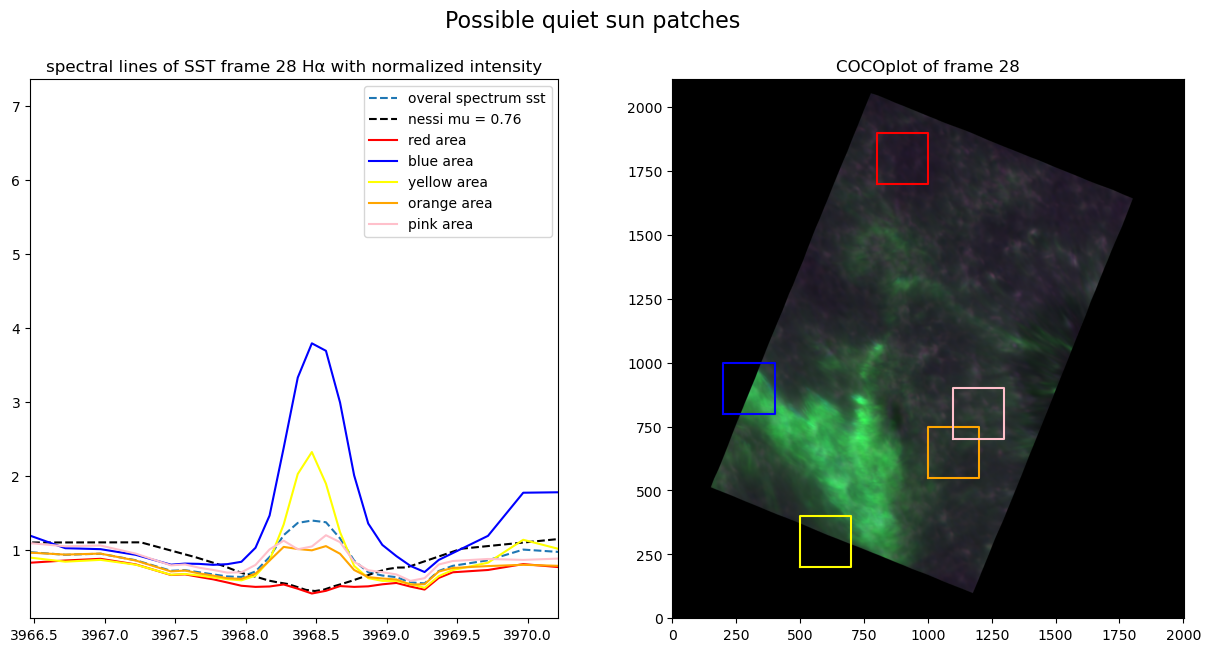

In [ ]:
frame=28

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaK.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(800,1000),(1700,1900)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaK.frame_integrated_spect(frame)
ax[0].plot(CaK._wavel, CaK.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_CaK.sst_wav + theta[0], theta[2] * theor_CaK.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]
ax[0].set_xlim((np.min(CaK._wavel), np.max(CaK._wavel[:-1])))



ax[1].imshow(CaK.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaK._wavel, CaK.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [ ]:
color_wanted_patch = 'red'

the edges of the patch are denoted by the xlim: (1100, 1300) and ylim: (700, 900)


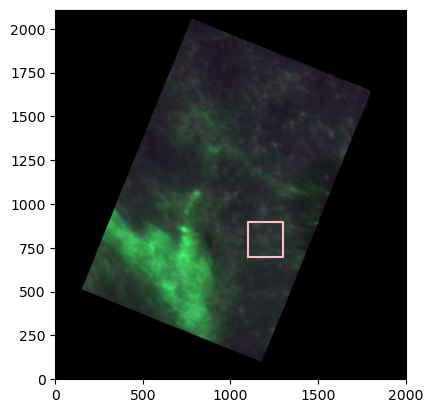

{'frame': 28, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'pink'}

In [55]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
CaK.quiet_sun

The quiet sun is pick at x (-0.6125436255237677, -0.3764449990309232) with average              mu 0.999999719336321


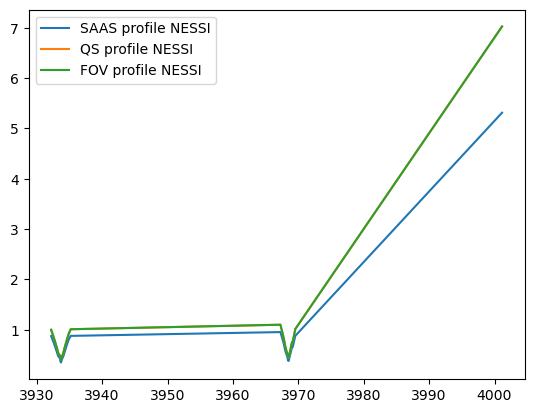

In [56]:
theor_CaK.set_quiet_sun(xlim=xlim, ylim=ylim)


the theta fit is  [-2.147439984320954, 0, 0.6119484015913363]


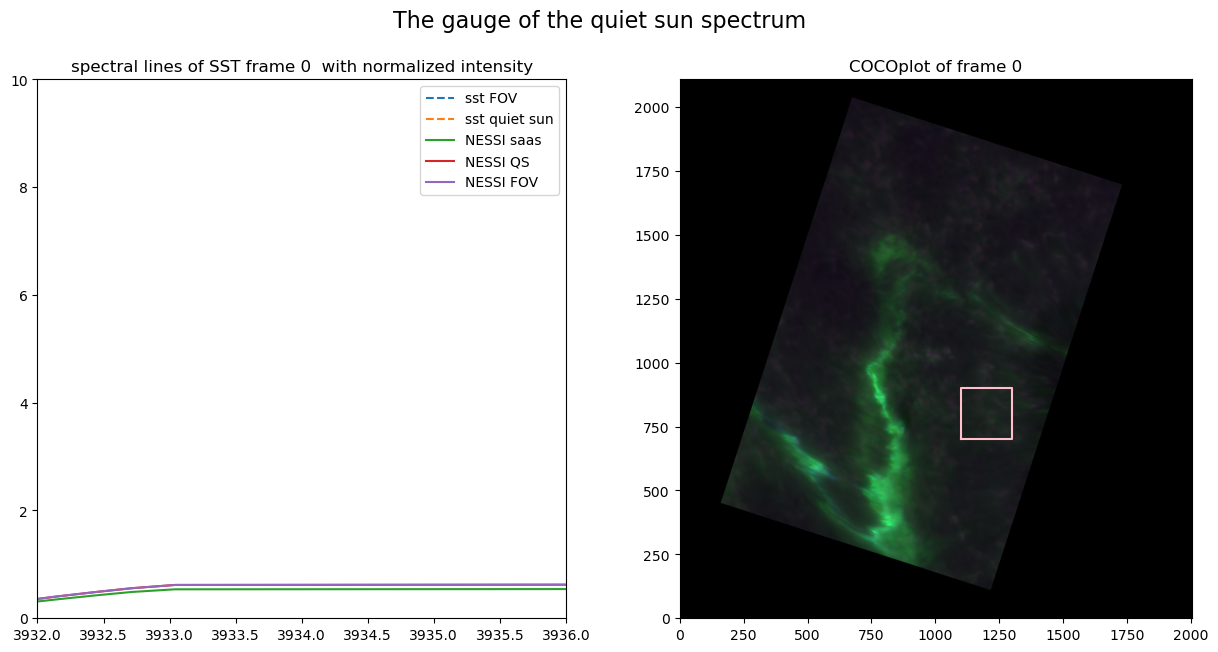

In [58]:
reload(un)
un.fit_qs_to_NESSI_cont_point(theor_CaK, CaK,  frame=0, xshift=None)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [61]:
sst_data = CaK
CaK.shape

(124, '??', 29, 2110, 2005)

In [62]:
CaK.calculate__FOV_spect_over_time()

In total 124 frames.
Now calculating frame:
47

123

In [63]:
sst_data.quiet_sun

{'frame': 28, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'pink'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

E:\solar flares/data/2017-09-06\use_nessi3.py:309: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:446: SyntaxWarning: invalid escape sequence '\A'
  labelx="wavelength $[\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:1210: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="fitting Nessi to sst data ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:1900: SyntaxWarning: invalid escape sequence '\D'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
E:\solar flares/data/2017-09-06\use_nessi3.py:1900: SyntaxWarning: invalid escape sequence '\A'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={

The peak occurs at frame [8] at time ['t=11:28:49 UT'].
The areafactor for THIS flare is 9.940559732735692e-10 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 0.0%.


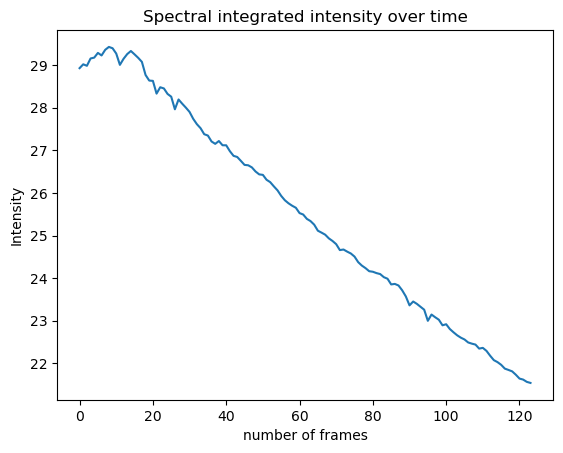

In [64]:
reload(un)
un.save_for_further_analysis(CaK, theor_CaK)


# Movie Making

In [73]:
# fill in here all arguments
theor_line = theor_CaK
sst_data = CaK
name_of_flare = "M2.5"
name_of_line = "CaK"
step=True
show_boundary=False

# un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step, show_boundary)

[3968.61671732 3968.86671732 3969.11671732 3969.36671732 3969.61671732
 3969.71671732 3969.81671732 3969.91671732 3970.01671732 3970.11671732
 3970.21671732 3970.31671732 3970.41671732 3970.51671732 3970.61671732
 3970.71671732 3970.81671732 3970.91671732 3971.01671732 3971.11671732
 3971.21671732 3971.31671732 3971.41671732 3971.51671732 3971.61671732
 3971.86671732 3972.11671732 3972.36671732 4001.14743998] [3932.19676006 3932.52204006 3932.78196005 3933.04188005 3933.10724005
 3933.17260005 3933.23796005 3933.30180005 3933.36716005 3933.43252005
 3933.49788004 3933.56172004 3933.62708004 3933.69244004 3933.75780004
 3933.82316004 3933.88700004 3933.95236004 3934.01772004 3934.08308004
 3934.14692004 3934.21228004 3934.27764004 3934.34300003 3934.60292003
 3934.86284003 3935.18812002 3967.25538616 3967.64602616 3967.84058616
 3967.90594616 3967.97130615 3968.03666615 3968.10050615 3968.16586615
 3968.23122615 3968.29658615 3968.36042615 3968.42578615 3968.49114615
 3968.55650615 3968

frame: 0, 11:27:45, total number of frames: 124 


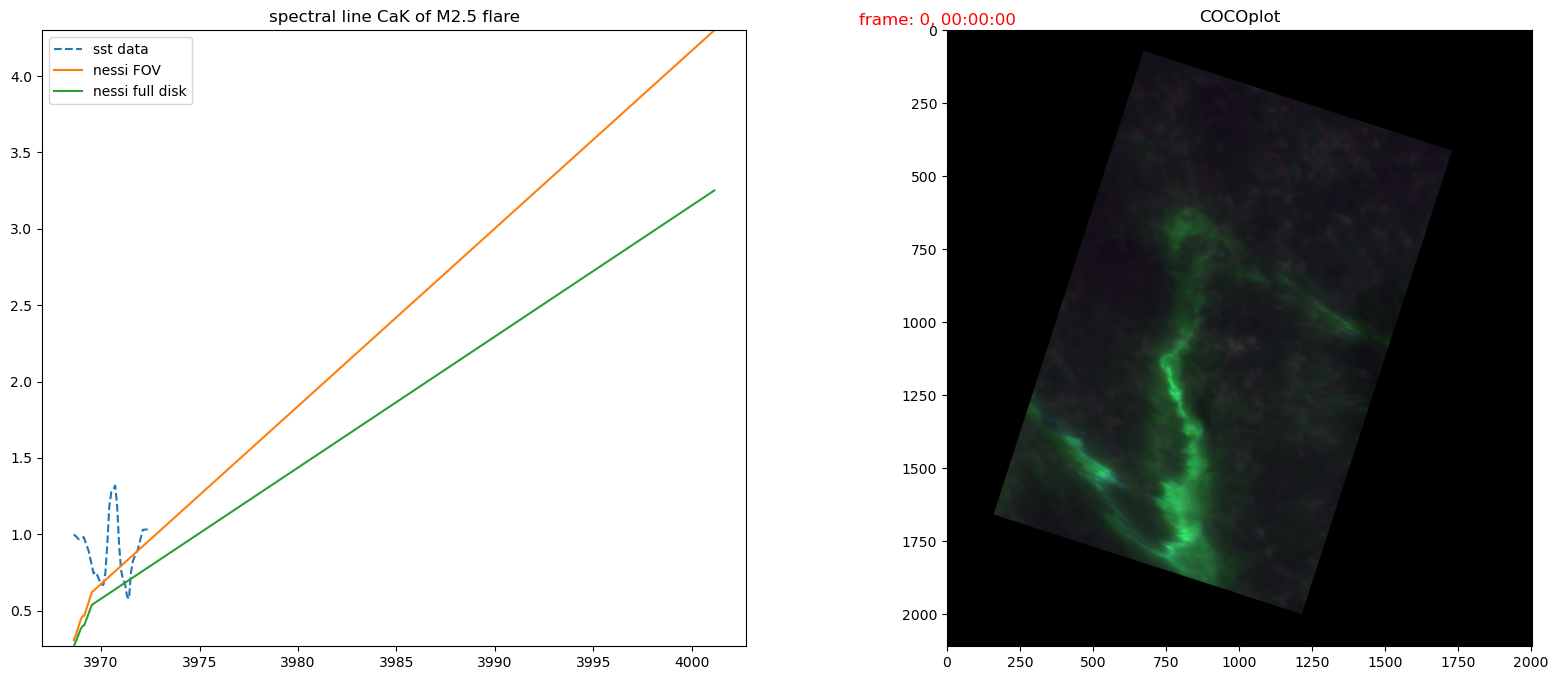

0 0 1 2 3 4 5 6 

In [ ]:
filename = f'E:/solar flares/data/animations/{name_of_flare.replace(".", "")}_{name_of_line}_animation.mp4'
import matplotlib.animation as animation
import use_nessi as un1

#params
frame = 0
fps = 6
nSeconds = 5
theta = sst_data.theta_nessi_to_quiet_sun
theta[1] = theta[2]

f_nessi_qs = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.spectr_qs 
                                , kind='linear', fill_value="extrapolate")
f_nessi_fov = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.spectr_fov 
                                , kind='linear', fill_value="extrapolate")
f_nessi_saas = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.saas_profile 
                                , kind='linear', fill_value="extrapolate")

print(sst_data._wavel - theta[0], theor_line.sst_wav)
wav = un1.merge_wavelengths(sst_data._wavel - theta[0], theor_line.sst_wav)
if "CaK" in name_of_line:
    wav = wav[:-1]
print(wav, theta, f_nessi_saas(theta)(wav))
mins=[np.min(f_nessi_saas(theta)(wav)), np.min(f_nessi_fov(theta)(wav))]
maxs=[np.max(f_nessi_saas(theta)(wav)), np.max(f_nessi_fov(theta)(wav))]
print(mins, maxs)

limit = un1.derive_intensity_lim(sst_data, 
                                mins,
                                maxs)

def frame_visualization(sst_data, frame, theta):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 8), gridspec_kw={"width_ratios":[1,1]})

    sst_data.ccp_frame(frame,Show=False)
    a=sst_data.current_ccp

    ax[0].set_title(f"spectral line {name_of_line} of {name_of_flare} flare")
    sst_data.frame_integrated_spect(frame)
    if 'CaK' in name_of_line:
        line_sst, = ax[0].plot(sst_data._wavel[:-1]-theta[0], sst_data.av_spect[:-1], '--', label='sst data') 
    else:
        line_sst, = ax[0].plot(sst_data._wavel-theta[0], sst_data.av_spect, '--', label='sst data')
    ax[0].plot(wav , f_nessi_fov(theta)(wav), label='nessi FOV')
    ax[0].plot(wav, f_nessi_saas(theta)(wav), label='nessi full disk')
    ax[0].legend()

    ax[0].set_ylim(limit)

    im = ax[1].imshow(Image.fromarray(sst_data.current_ccp[::-1,:]))
    if show_boundary:
        ax[1].imshow(Image.fromarray(sst_data.boundary[::-1,:]), alpha=0.3)
    ax[1].set_title("COCOplot")
    text = ax[1].text(
        -300,
        -20,
        f"frame: {frame}, {un1.time_hulp(sst_data.TIME[frame])}",
        fontsize=12,
        color='red',
    )
    print(
        f"frame: {frame}, {sst_data._time[frame]}, total number of frames: {sst_data._number_of_frames} "
    )

    plt.show()

    return fig, line_sst,  im, text




fig, line_sst, im, text, = frame_visualization(sst_data, frame, sst_data.theta_nessi_to_quiet_sun)

# animation function.  This is called sequentially
def animate(i):
    # step of number of frames. How to step through the frames, at which rate.
    frame = step * i

    x = sst_data._wavel-theta[0]
    y = sst_data.frame_integrated_spect(frame)
    # f_sst2 = interp1d(sst_data._wavel-theta[0], y, kind='linear', fill_value="extrapolate")
    line_sst.set_data(x, y)

    print(frame, end=" ")


    text.set_text(f"frame: {str(frame)}, {str(sst_data._time[frame])[:8]}")
    # text = ax[1].text(
    #     -300, -20, f"frame: {str(frame)}, {str(sst_data._time[frame])[2:10]}", fontsize=12, color='red'
    # )    
    sst_data.ccp_frame(frame,Show=False)
    a = sst_data.current_ccp
    im.set_array(Image.fromarray(a[::-1,:]))
    return line_sst, [im], text


# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                            frames=(sst_data._number_of_frames-1) // step, interval=500) 

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save(filename, fps=fps) # , extra_args=['-vcodec', 'libx264']



print("We are exiting this kernel")